In [11]:
import pandas as pd 

from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [15]:
df= pd.read_csv('./data/positive_emotion_dataset_improved.csv')
df

,ad,pos_emo,lemmatized
0,the union is empowering educators to make the ...,0,union empower educator law work student half t...
1,thank our nurses by supporting their call for ...,0,thank nurse support paid leave fall ill covid
2,better schools lower cost health care more o...,0,well school low cost health care opportuni...
3,the trump administration is plowing ahead with...,1,trump administration plow ahead social medium ...
4,are you ready to vote for ayanna on september ...,1,ready vote ayanna september th sure voice hear...
...,...,...,...
8318,discount month course of psychology basics t...,0,discount month course psychology basic thi...
8319,andrew gillum is running the most energized au...,1,andrew gillum run energized authentic progress...
8320,as a young black millennial im really excited ...,1,young black millennial m excited vote join las...
8321,it took thousands of hours of work by dedicate...,1,take thousand hour work dedicated austinite ex...


In [16]:
X_train,  X_test, y_train, y_test  = train_test_split(df['lemmatized'], df['pos_emo'], test_size =0.2  , random_state = 42)

In [22]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [23]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.750
              precision    recall  f1-score   support

 no-scarcity       0.95      0.24      0.38       537
    scarcity       0.73      0.99      0.84      1128

    accuracy                           0.75      1665
   macro avg       0.84      0.62      0.61      1665
weighted avg       0.80      0.75      0.69      1665

confusion matrix:
[[ 127  410]
 [   7 1121]]



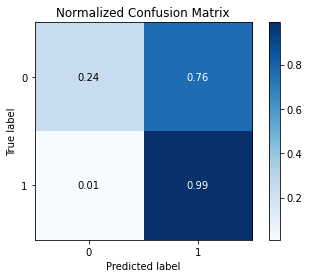

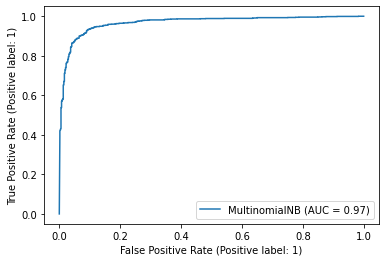

In [24]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no-scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [34]:
df_val = pd.read_csv('./data/sample_positive_emotion.csv')
df_val

,ad,pos_emo,lemmatized
0,see why everyone is celebrating at hoblit dodg...,1,see why everyone be celebrate at hoblit dodge ...
1,help give people without a home a chance to le...,0,help give people without a home a chance to le...
2,i am so proud of what this grassroots team has...,1,I be so proud of what this grassroot team have...
3,we have until march st to raise money for our ...,0,we have until march st to raise money for our ...
4,learn how to use the new staffing law to impro...,0,learn how to use the new staffing law to impro...
...,...,...,...
145,let us build cameroon wake up cameroonians and...,0,let we build cameroon wake up cameroonian and ...
146,studies show that of all children possess crea...,1,study show that of all child possess creative ...
147,if you are a developer who wants to make a dif...,1,if you be a developer who want to make a diffe...
148,learn the greatest tips tricks from the world ...,1,learn the great tip trick from the world be mo...


accuracy:   0.287
              precision    recall  f1-score   support

  no-pos_emo       1.00      0.07      0.13       115
     pos_emo       0.25      1.00      0.40        35

    accuracy                           0.29       150
   macro avg       0.62      0.53      0.26       150
weighted avg       0.82      0.29      0.19       150

confusion matrix:
[[  8 107]
 [  0  35]]



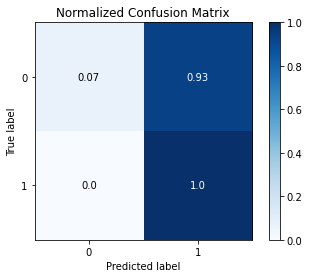

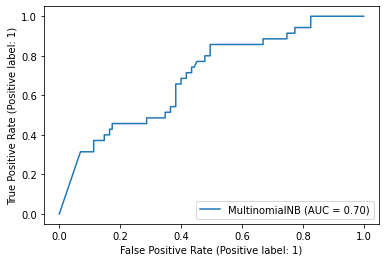

In [35]:
X_val = tf_vectorizer.transform(df_val['lemmatized'])
y_val = df_val['pos_emo']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-pos_emo', 'pos_emo']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)